In [2]:
#Import the train data
import pandas as pd
df=pd.read_csv('Week7_train.csv');
print(df.info)

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       

In [3]:
#check the shape of the data
df.shape

(42000, 785)

In [4]:
# select only 10% of the data from the experiment .will not use  total data as  KNN isdf=df.sample
mf=df.sample(frac=0.10)
mf.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
7416       8       0       0       0       0       0       0       0       0   
1031       9       0       0       0       0       0       0       0       0   
1192       1       0       0       0       0       0       0       0       0   
33258      5       0       0       0       0       0       0       0       0   
8944       2       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
30349      7       0       0       0       0       0       0       0       0   
36166      5       0       0       0       0       0       0       0       0   
26174      8       0       0       0       0       0       0       0       0   
5289       5       0       0       0       0       0       0       0       0   
96         1       0       0       0       0       0       0       0       0   

       

In [5]:
#5.print shape of selected dataset
mf.shape

(4200, 785)

In [6]:
#6.look at the top 5 rows
print(mf.iloc[:5])

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
7416       8       0       0       0       0       0       0       0       0   
1031       9       0       0       0       0       0       0       0       0   
1192       1       0       0       0       0       0       0       0       0   
33258      5       0       0       0       0       0       0       0       0   
8944       2       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
7416        0  ...         0         0         0         0         0   
1031        0  ...         0         0         0         0         0   
1192        0  ...         0         0         0         0         0   
33258       0  ...         0         0         0         0         0   
8944        0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
7416          0         0   

In [7]:
#7.find no of unique class  labels
unique_classes = mf['label'].unique()
print(f"Unique class labels: {unique_classes}")


Unique class labels: [8 9 1 5 2 3 4 7 6 0]


In [8]:
#8.find the no of examples for each class label
examples=mf['label'].value_counts()
print(examples)

label
3    472
1    470
2    445
0    433
7    424
9    414
6    412
5    384
8    375
4    371
Name: count, dtype: int64


In [9]:
#9.prepare x and y
x= mf.drop('label', axis=1)
y=mf[['label']]
print(x)
print(y)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
7416        0       0       0       0       0       0       0       0       0   
1031        0       0       0       0       0       0       0       0       0   
1192        0       0       0       0       0       0       0       0       0   
33258       0       0       0       0       0       0       0       0       0   
8944        0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
30349       0       0       0       0       0       0       0       0       0   
36166       0       0       0       0       0       0       0       0       0   
26174       0       0       0       0       0       0       0       0       0   
5289        0       0       0       0       0       0       0       0       0   
96          0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

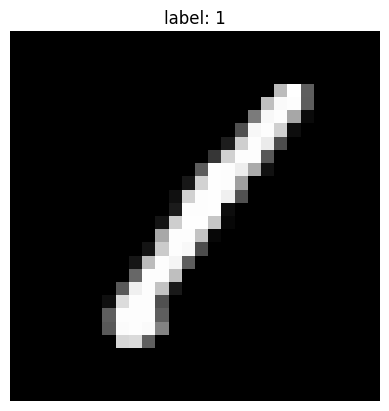

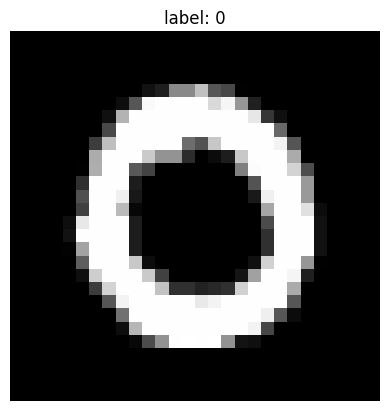

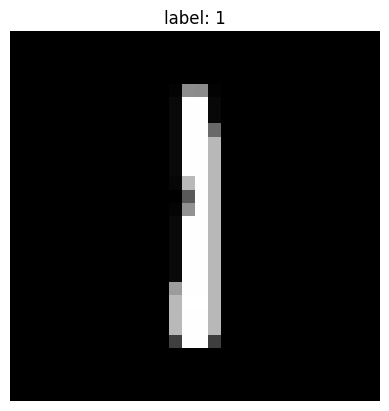

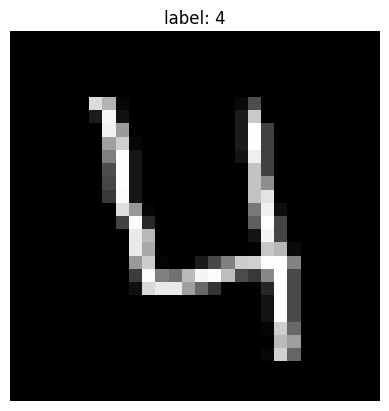

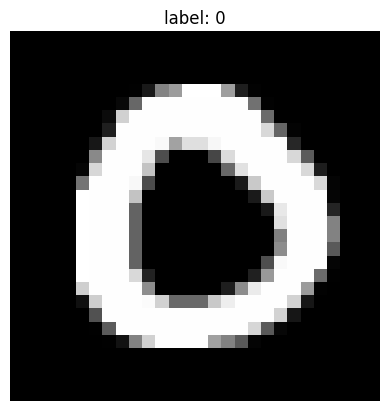

In [10]:
#10.Visualization the image of the first 5 digital in x also print the class label in
import matplotlib.pyplot as plt
for i in range(5):
 plt.imshow(df.iloc[i,1:].values.reshape(28,28),cmap='grey')
 plt.title(f"label: {df.iloc[i,0]}")
 plt.axis("off")
 plt.show()   


In [11]:
#11.split the train dataset into training set 75% and validation set 25%
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_val)
print(x_train)

NameError: name 'x_val' is not defined

In [12]:
#12. and 13 fit KNN classifier to training data  default parameters n-neighbours=5 metric=minkowski p=2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train, y_train)
#without ravel warning is occuring
# or
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)
 #or
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
#or
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(x_train, y_train) 




/home/user/demo/notebookenv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/user/demo/notebookenv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/user/demo/notebookenv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/user/demo/notebookenv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d ar

KNeighborsClassifier(metric='manhattan')

In [13]:
#14.predict the validation set result
y_pred = knn.predict(x_test)
print(y_pred[:5])

[1 0 5 2 9]


In [14]:
#15.print the confusion matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred);
print(cf)

[[110   1   0   0   0   0   1   0   0   0]
 [  0 112   0   1   0   0   0   0   0   0]
 [  2   5 112   0   0   0   1   4   1   0]
 [  0   2   0 108   0   2   0   3   2   0]
 [  0   2   0   0  85   0   0   1   0   7]
 [  1   3   0   0   0  81   2   0   0   0]
 [  1   2   0   0   0   3  99   0   0   0]
 [  2   7   0   0   1   0   0 100   0   3]
 [  1   7   0   3   2   2   1   1  69   2]
 [  0   1   0   0   1   0   0   3   0  90]]


In [16]:
#16.printing classification report and accuracy
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       112
           1       0.79      0.99      0.88       113
           2       1.00      0.90      0.95       125
           3       0.96      0.92      0.94       117
           4       0.96      0.89      0.92        95
           5       0.92      0.93      0.93        87
           6       0.95      0.94      0.95       105
           7       0.89      0.88      0.89       113
           8       0.96      0.78      0.86        88
           9       0.88      0.95      0.91        95

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.92      1050
weighted avg       0.93      0.92      0.92      1050

0.92


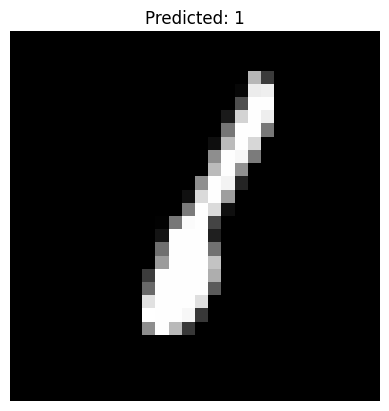

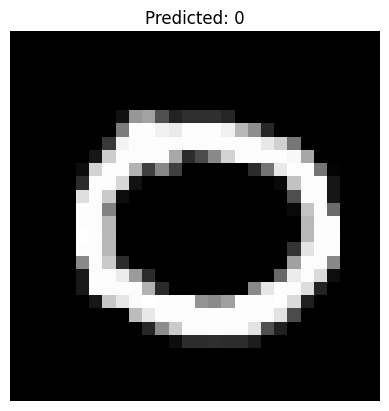

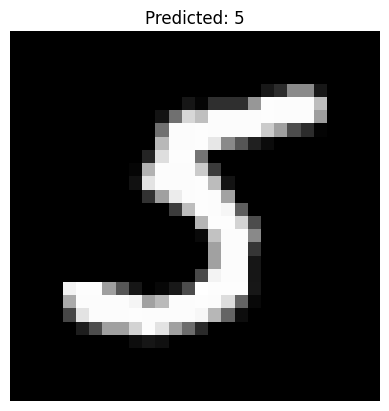

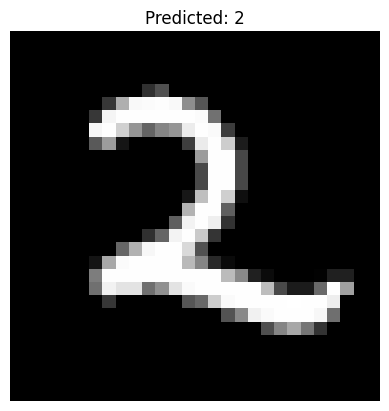

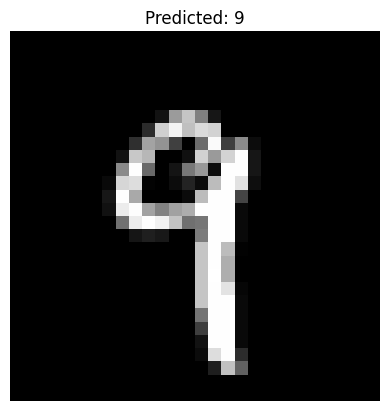

In [26]:
#17.visualize the image of the first 5 digits in x-test also print predicted
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # <-- reshape here
    plt.title(f"Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()
